## Image Processing with Scikit-learn

### Definition
Image processing are operations on images and videos to:
- Enhance an image
- Extract useful information
- Analyze it and make decisions

### Applications
- Medical image analysis
- Artificial intelligence
- Image restoration and enhancement
- Geospatial computing
- Surveillance
- Robotic vision
- Automotive safety
- And many more...

![image](https://github.com/user-attachments/assets/41f67b51-9044-4a52-ac84-8de19bb2c2a7)

### Image as an Array
- RGB
- Black and White
- Greyscale 

![af9c904c-53ce-436d-87dd-601a99316345-2992244441](https://github.com/user-attachments/assets/e6fc6a7f-ab0e-4650-a879-336941f2fc05)

### scikit-image
- Easy to use
- Makes use of Machine Learning
- Out of the box complex algorithms
![image](https://github.com/user-attachments/assets/e831a97c-cf9c-4602-b3ab-d585cecaf029)

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from skimage import data
from skimage import color

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    """
    Show an image with title and color mapping
    Args:
        - image: np.array
        - title: Title of the image
        - cmap_type: Color mapping type, 'gray' for grayscale as default
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, filtered, title_filtered):
    """
    Show two images alongside to plot comparison
    Args:
        - original: 
        - filtered:
        - title_filtered: Title for the filtered image
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

### Colors, shape and size with Numpy

Datatype:  <class 'numpy.ndarray'>
Image size:  786432
Image shape:  (512, 512, 3)


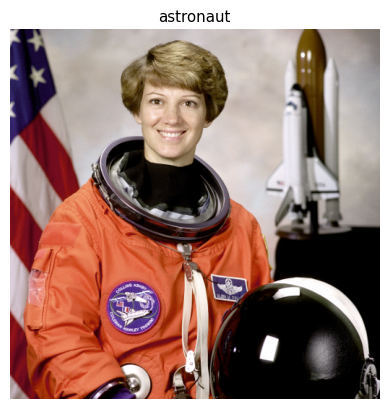

In [58]:
# lake_image = plt.imread('foster-lake.jpg')
original = data.astronaut()

print("Datatype: ", type(original))
print("Image size: ", original.size)
print("Image shape: ", original.shape)
show_image(original, title="astronaut")

#### Obtaining the colors

In [59]:
# Obtaining the red values of the image
red = original[:, :, 0]
# Obtaining the green values of the image
green = original[:, :, 1]
# Obtaining the blue values of the image
blue = original[:, :, 2]

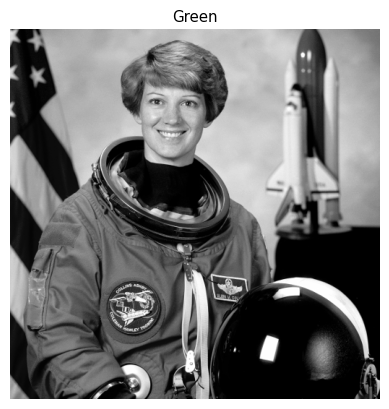

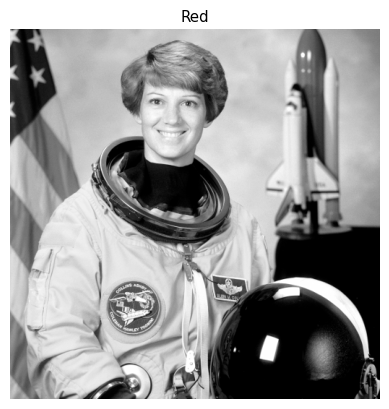

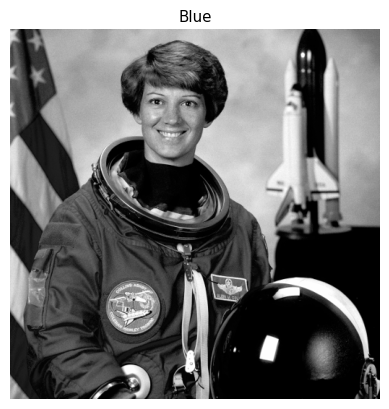

In [60]:
show_image(green, title="Green")
show_image(red, title="Red")
show_image(blue, title="Blue")

### Color histograms

#### Applications
- Analysis
- Thresholding
- Brightness and contrast
- Equalize an image

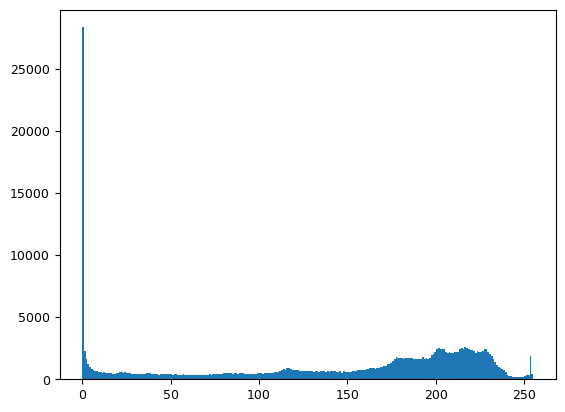

In [61]:
plt.hist(red.ravel(), bins=256);

### ***Main functions of image processing***
- Filtering
- Tranformation
- Segmentation

#### **1. Filtering**

- Enhancing an image
- Emphasize or remove features
- Smoothing
- Sharpening
- Edge detection

- **Gaussian smoothing**

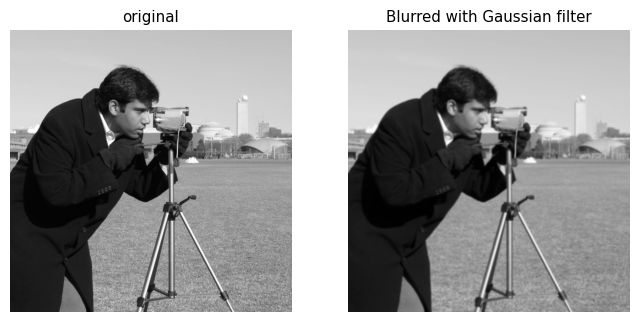

In [71]:
# Import the module and function
from skimage.filters import gaussian

to_smooth = data.camera()
gaussian_image = gaussian(to_smooth)

# Show original and resulting image to compare
plot_comparison(to_smooth, gaussian_image, "Blurred with Gaussian filter")

- **Edge Detection**

- Sobel Edge detection

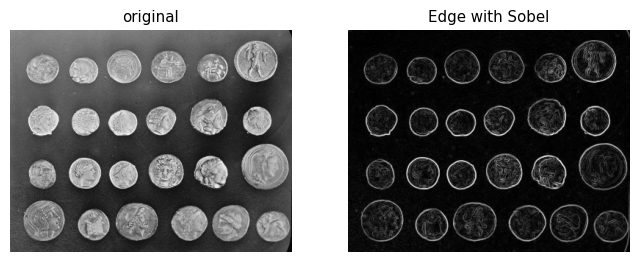

In [69]:
# Import module and function
from skimage.filters import sobel

image_coins = data.coins()

# Apply edge detection filter
edge_sobel = sobel(image_coins)

# Show original and resulting image to compare
plot_comparison(image_coins, edge_sobel, "Edge with Sobel")

- Canny Edge detection

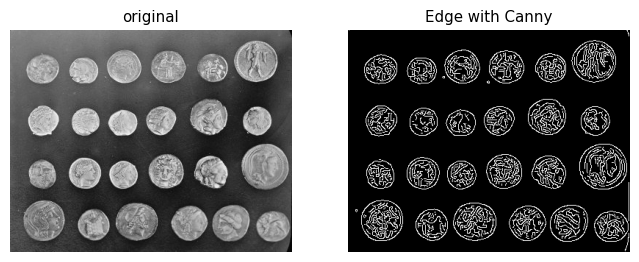

In [73]:
from skimage.feature import canny

# Apply edge detection filter
edge_canny = canny(image_coins)

# Show original and resulting image to compare
plot_comparison(image_coins, edge_canny, "Edge with Canny")

#### **2. Transformation**

- Preparing images for classification Machine Learning models
- Optimization and compression of images
- Save images with same proportion

![image](https://github.com/user-attachments/assets/5fdfcd71-7c4b-47e0-b114-e0b095fc60eb)

- **Rotation**

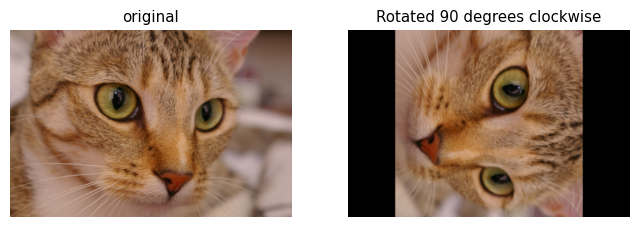

In [65]:
from skimage.transform import rotate

dogs_image = data.chelsea()
# Rotate the image 90 degrees clockwise
image_rotated = rotate(dogs_image, -90)

plot_comparison(dogs_image, image_rotated, 'Rotated 90 degrees clockwise')

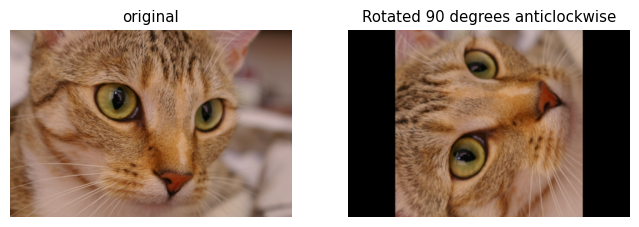

In [66]:
from skimage.transform import rotate

# Rotate an image 90 degrees anticlockwise
image_rotated = rotate(dogs_image, 90)
plot_comparison(dogs_image, image_rotated, 'Rotated 90 degrees anticlockwise')

- **Resizing**

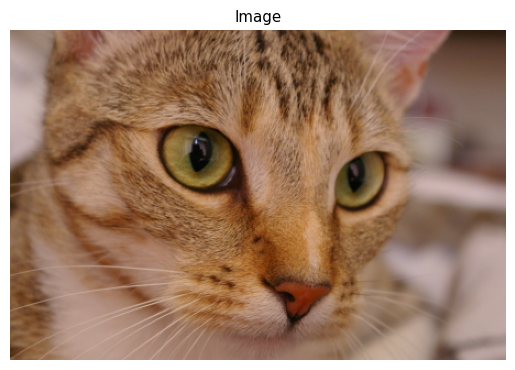

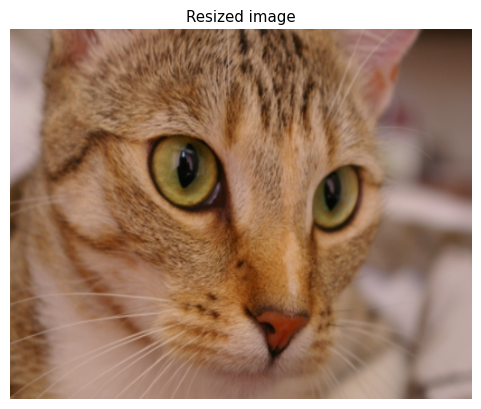

In [67]:
from skimage.transform import resize

# Height and width to resize
height = 400
width = 500

image_resized = resize(dogs_image, (height, width)) # Resize image

show_image(dogs_image)
show_image(image_resized, 'Resized image')

- **REsizing proprtionally**

(300, 451, 3)
(75, 113, 3)


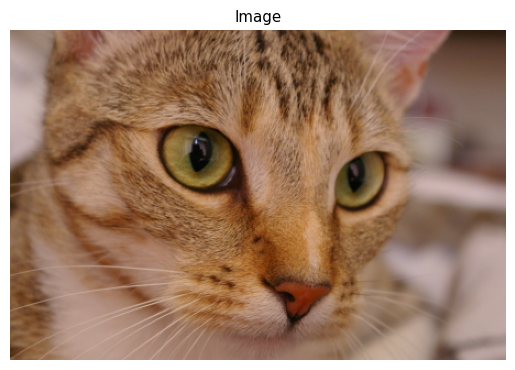

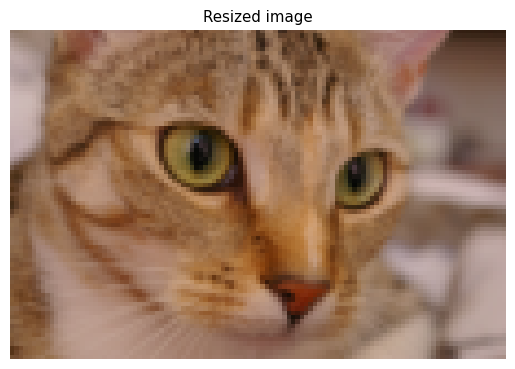

In [68]:
from skimage.transform import resize

# Set proportional height so its 4 times its size

height = dogs_image.shape[0] / 4
width = dogs_image.shape[1] / 4

# Resize image
image_resized = resize(dogs_image, (height, width))

print(dogs_image.shape)
print(image_resized.shape)

show_image(dogs_image)
show_image( image_resized, 'Resized image')

- **Morphology**
    - better for binary images
    - Can extend for grayscale
    - Operations:
        - Dilation
        - Erosion

In [62]:
image_horse = data.horse()

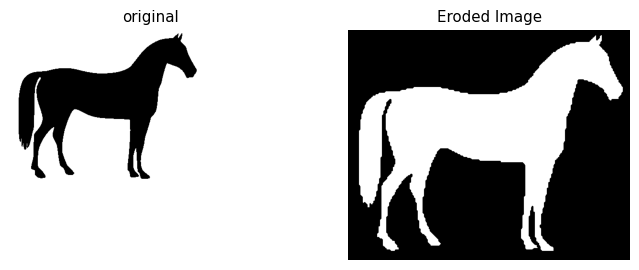

In [63]:
from skimage import morphology

# Perform binary erosion
eroded_image = morphology.binary_erosion(binary_image)
plot_comparison(image_horse, eroded_image, "Eroded Image")

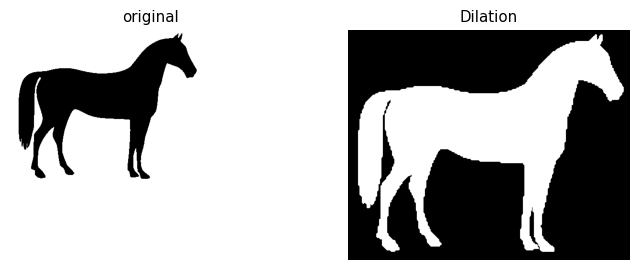

In [64]:
dilated_image = morphology.binary_dilation(binary_image) # Obtain dilated image, using binary dilation

plot_comparison(image_horse, dilated_image, 'Dilation')

#### **3. Sgementation**

- **Thresholding**


Partitioning an image into a foreground and background By making it black and white We do so by setting each pixel to: 
- 255 (white) if pixel > thresh value
- 0 (black) if pixel < thresh value

Simplest method of image segmentation
- Isolate objects
    - Object detection
    - Face detection

Only from grayscale images

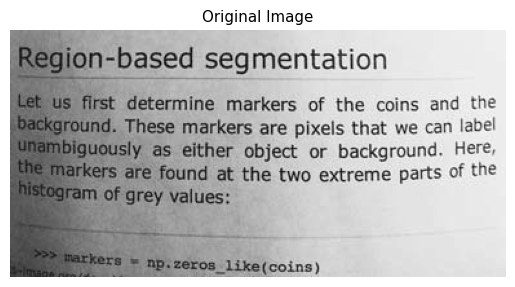

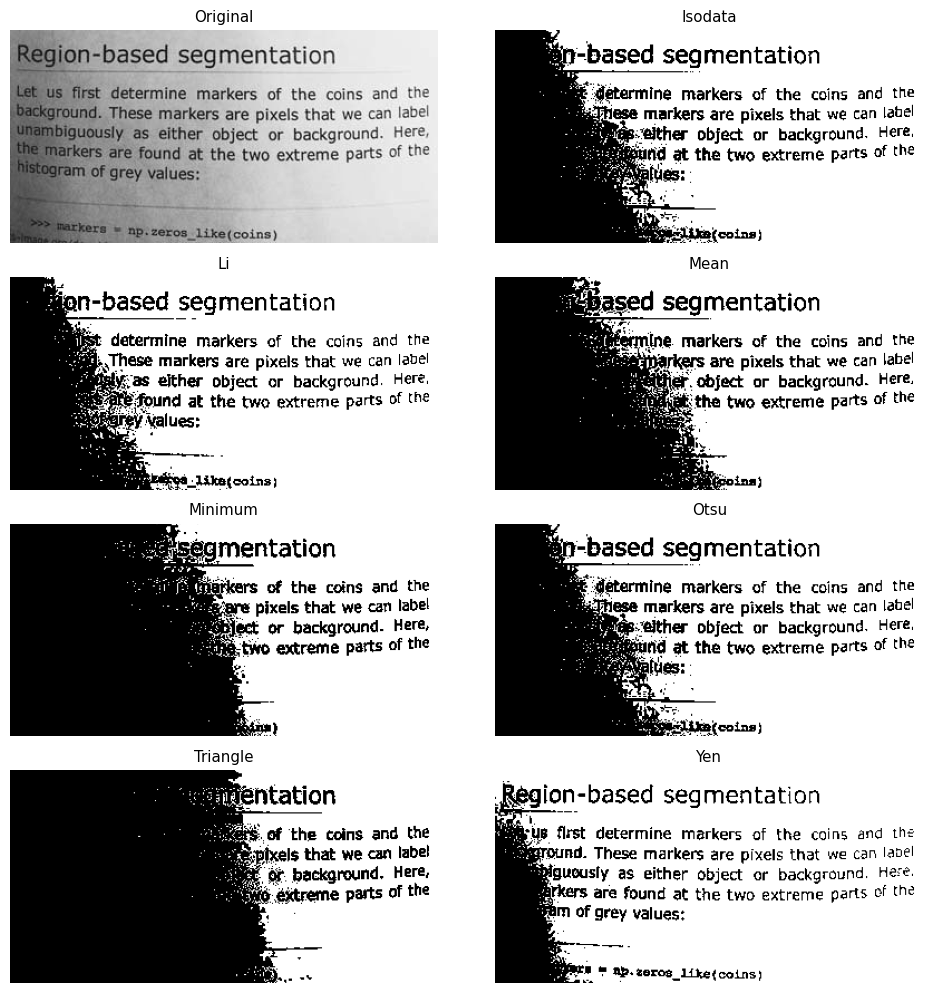

In [75]:
from skimage.filters import try_all_threshold

image = data.page()

show_image(image, title="Original Image")

# Obtain all the resulting images
fig, ax = try_all_threshold( image, figsize=(10, 10), verbose=False)
plt.show()

- Global thresholding

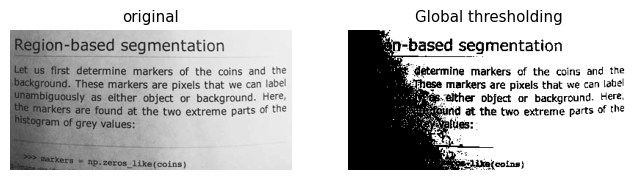

In [80]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu, rank

thresh = threshold_otsu(image) # Obtain the optimal threshold value
binary_global = image >= thresh  # Apply thresholding to the image

plot_comparison(image, binary_global, 'Global thresholding')

- Local thresholding

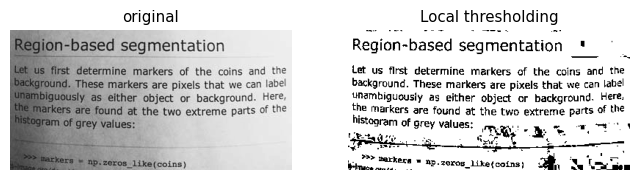

In [89]:
local_otsu = rank.otsu(image, morphology.disk(15))
plot_comparison(image, local_otsu <= image, 'Local thresholding')